In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import tqdm
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

#Import Data and Split

In [ ]:
df = pd.read_csv('./drive/MyDrive/WORKING_F1Data.csv')

In [ ]:
df

,Season,Grand Prix,Driver,Constructor,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position
0,2023,bahrain-grand-prix,Pérez,Red Bull,92.758,0.000,21.0,91.078,0.171,26.0,92.446,0.106,12.0,2.0
1,2023,bahrain-grand-prix,Alonso,Aston Martin,93.196,0.438,22.0,90.907,0.000,25.0,92.340,0.000,13.0,5.0
2,2023,bahrain-grand-prix,Verstappen,Red Bull,93.375,0.617,21.0,91.076,0.169,24.0,92.345,0.005,13.0,1.0
3,2023,bahrain-grand-prix,Norris,McLaren,94.165,1.407,21.0,91.570,0.663,27.0,93.202,0.862,16.0,11.0
4,2023,bahrain-grand-prix,Leclerc,Ferrari,94.257,1.499,17.0,91.367,0.460,26.0,92.624,0.284,21.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,2003,japanese-grand-prix,Firman,Jordan,93.306,2.579,18.0,96.368,3.437,13.0,95.620,4.471,15.0,15.0
6791,2003,japanese-grand-prix,Fisichella,Jordan,93.956,3.229,17.0,96.705,3.774,10.0,95.476,4.327,15.0,16.0
6792,2003,japanese-grand-prix,Button,BAR,94.445,3.718,9.0,94.171,1.240,18.0,93.411,2.262,22.0,9.0
6793,2003,japanese-grand-prix,Verstappen,Minardi,95.180,4.453,13.0,96.928,3.997,13.0,97.379,6.230,6.0,17.0


In [ ]:
test_df= df[df["Season"]>=2021]
train_df =df[df["Season"]<2021].reset_index(drop=True)

In [ ]:
train_df

,Season,Grand Prix,Driver,Constructor,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position
0,2020,austrian-grand-prix,Hamilton,Mercedes,64.816,0.000,42.0,64.304,0.000,42.0,64.130,0.000,21.0,2.0
1,2020,austrian-grand-prix,Bottas,Mercedes,65.172,0.356,38.0,64.501,0.197,37.0,64.277,0.147,22.0,1.0
2,2020,austrian-grand-prix,Verstappen,Red Bull,65.418,0.602,37.0,65.215,0.911,41.0,64.413,0.283,20.0,3.0
3,2020,austrian-grand-prix,Sainz,McLaren,65.431,0.615,41.0,65.352,1.048,37.0,65.177,1.047,24.0,8.0
4,2020,austrian-grand-prix,Pérez,Racing Point,65.512,0.696,33.0,64.945,0.641,48.0,64.605,0.475,19.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,2003,japanese-grand-prix,Firman,Jordan,93.306,2.579,18.0,96.368,3.437,13.0,95.620,4.471,15.0,15.0
5845,2003,japanese-grand-prix,Fisichella,Jordan,93.956,3.229,17.0,96.705,3.774,10.0,95.476,4.327,15.0,16.0
5846,2003,japanese-grand-prix,Button,BAR,94.445,3.718,9.0,94.171,1.240,18.0,93.411,2.262,22.0,9.0
5847,2003,japanese-grand-prix,Verstappen,Minardi,95.180,4.453,13.0,96.928,3.997,13.0,97.379,6.230,6.0,17.0


In [ ]:
test_df

,Season,Grand Prix,Driver,Constructor,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position
0,2023,bahrain-grand-prix,Pérez,Red Bull,92.758,0.000,21.0,91.078,0.171,26.0,92.446,0.106,12.0,2.0
1,2023,bahrain-grand-prix,Alonso,Aston Martin,93.196,0.438,22.0,90.907,0.000,25.0,92.340,0.000,13.0,5.0
2,2023,bahrain-grand-prix,Verstappen,Red Bull,93.375,0.617,21.0,91.076,0.169,24.0,92.345,0.005,13.0,1.0
3,2023,bahrain-grand-prix,Norris,McLaren,94.165,1.407,21.0,91.570,0.663,27.0,93.202,0.862,16.0,11.0
4,2023,bahrain-grand-prix,Leclerc,Ferrari,94.257,1.499,17.0,91.367,0.460,26.0,92.624,0.284,21.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2021,abu-dhabi-grand-prix,Stroll,Aston Martin,86.608,1.599,26.0,85.385,1.694,26.0,84.821,1.547,22.0,13.0
942,2021,abu-dhabi-grand-prix,Ricciardo,McLaren,86.676,1.667,29.0,84.959,1.268,26.0,84.733,1.459,16.0,10.0
943,2021,abu-dhabi-grand-prix,Latifi,Williams,87.487,2.478,27.0,85.687,1.996,22.0,85.322,2.048,19.0,16.0
944,2021,abu-dhabi-grand-prix,Schumacher,Haas,87.698,2.689,24.0,85.784,2.093,27.0,85.340,2.066,18.0,19.0


##EDA

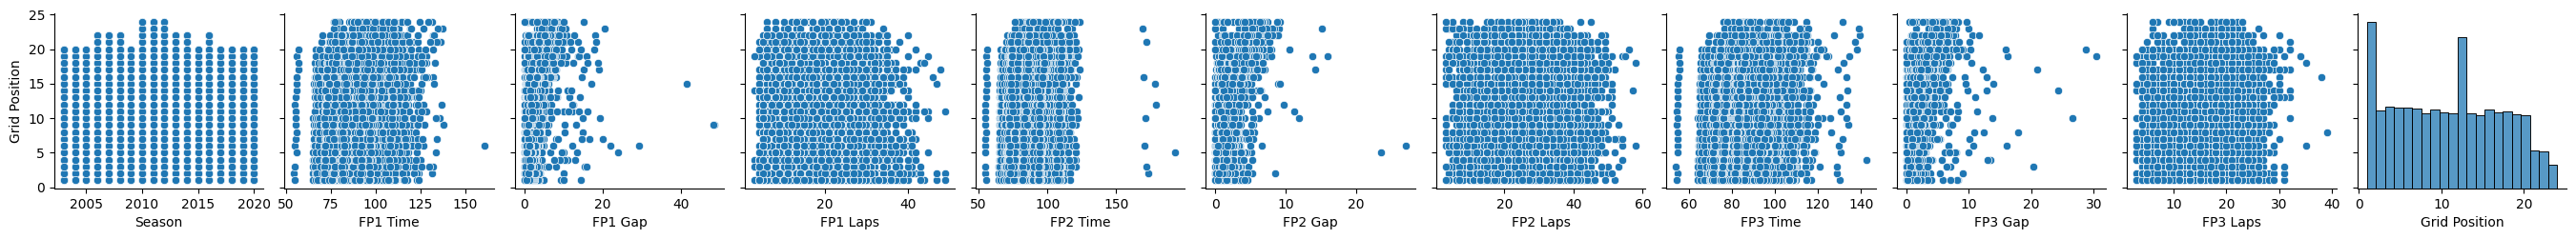

In [ ]:
sns.pairplot(train_df, y_vars="Grid Position")

In [ ]:
train_df.columns

Index(['Season', 'Grand Prix', 'Driver', 'Constructor', 'FP1 Time', 'FP1 Gap',
       'FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap',
       'FP3 Laps', 'Grid Position'],
      dtype='object')

In [ ]:
train_df[[ 'FP1 Time', 'FP1 Gap',
       'FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap',
       'FP3 Laps', 'Grid Position']].corr()

,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position
FP1 Time,1.000000,0.311591,-0.289511,0.948346,0.228846,-0.240347,0.913585,0.179809,-0.125892,0.101289
FP1 Gap,0.311591,1.000000,-0.270071,0.185256,0.524752,-0.160110,0.205755,0.443083,-0.025932,0.450305
FP1 Laps,-0.289511,-0.270071,1.000000,-0.231329,-0.127825,0.417216,-0.222701,-0.077439,0.361672,-0.009935
FP2 Time,0.948346,0.185256,-0.231329,1.000000,0.266213,-0.300622,0.896357,0.156980,-0.107945,0.092194
FP2 Gap,0.228846,0.524752,-0.127825,0.266213,1.000000,-0.268840,0.203940,0.583858,0.033997,0.610165
FP2 Laps,-0.240347,-0.160110,0.417216,-0.300622,-0.268840,1.000000,-0.191604,-0.104973,0.174315,-0.046862
FP3 Time,0.913585,0.205755,-0.222701,0.896357,0.203940,-0.191604,1.000000,0.287740,-0.259327,0.096327
FP3 Gap,0.179809,0.443083,-0.077439,0.156980,0.583858,-0.104973,0.287740,1.000000,-0.148656,0.534790
FP3 Laps,-0.125892,-0.025932,0.361672,-0.107945,0.033997,0.174315,-0.259327,-0.148656,1.000000,0.103914
Grid Position,0.101289,0.450305,-0.009935,0.092194,0.610165,-0.046862,0.096327,0.534790,0.103914,1.000000


Gap looks highly correlated with grid position, lower gap to first, the lower the grid position

##Get Dummies for constructors

In [ ]:
pd.get_dummies(train_df["Constructor"])

,Alfa Romeo,AlphaTauri,BAR,BMW Sauber,Brawn,Caterham,Ferrari,Force India,HRT,Haas,...,Racing Point,Red Bull,Renault,Sauber,Spyker,Super Aguri,Toro Rosso,Toyota,Virgin,Williams
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5845,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5846,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5847,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#NN

##Convert to Tensors

In [ ]:
train_df.columns

Index(['Season', 'Grand Prix', 'Driver', 'Constructor', 'FP1 Time', 'FP1 Gap',
       'FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap',
       'FP3 Laps', 'Grid Position'],
      dtype='object')

In [ ]:
sum=0
for i in range(len(train_df)):
  if train_df["Grid Position"][i]>20:
    sum =sum+1

sum

349

There are more than 20 racers in some races, there are some with up to 24 it seems. Drop those since there are a max of 20 in the test set for all races.


In [ ]:
bad=[]
for i in range(len(train_df)):
  if train_df["Grid Position"][i]>20:
    bad.append(i)

train_df2 = train_df.drop(bad)

In [ ]:
trainX_df = train_df2[['FP1 Time', 'FP1 Gap','FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap','FP3 Laps']]

trainY_df = pd.get_dummies(train_df2["Grid Position"], dtype=float)

train_X =torch.Tensor(np.copy(trainX_df))
train_Y = torch.Tensor(np.copy(trainY_df))

In [ ]:
testX_df = test_df[['FP1 Time', 'FP1 Gap','FP1 Laps', 'FP2 Time', 'FP2 Gap', 'FP2 Laps', 'FP3 Time', 'FP3 Gap','FP3 Laps']]

testY_df = pd.get_dummies(test_df["Grid Position"], dtype=float)

test_X =torch.Tensor(np.copy(testX_df))
test_Y = torch.Tensor(np.copy(testY_df))

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, x, y, batch_size=64):
    #data
    self.x=x
    self.y=y

    #aux var
    self.N=len(x) #num of samples in data
    self.batch_size=batch_size

  def __len__(self): #returns num of samples in dataset
    return self.N

  def __getitem__(self, index):
    x = self.x[index]
    y= self.y[index]

    return x, y

In [ ]:
batch_size=64 #minibatch from literature
dataset = CustomDataset(train_X, train_Y, batch_size)
dataloader = DataLoader(dataset, batch_size, shuffle=True) #the deepONet in deepxde shuffles the data between epochs

In [ ]:
num_cat = len(train_Y[0]) #we have 20 categories
num_in = len(train_X[0]) #3x3 inputs, so 9

##Model

In [ ]:
class Dense(nn.Module):
  def __init__(self , numhiddens):
    super(Dense, self).__init__()

    self.Layers =nn.ModuleList([nn.Linear(numhiddens[0], numhiddens[1])])
    for i in range(1, len(numhiddens)-1):
      self.Layers.append(nn.Linear(numhiddens[i], numhiddens[i+1]))

    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    out = self.Layers[0](x)
    for i in range(1, len(self.Layers)):
      out = self.relu(out)
      out = self.Layers[i](out)

    return self.softmax(out)

In [ ]:
model = Dense([num_in, 64, 64, 64, num_cat]) #we have 3x3 input, and 20 grid positions
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

##Training

In [ ]:
epochs = 1000
loss_hist =[]

for i in tqdm.tqdm(range(epochs)):
  model.train()
  for batch, (x, y) in enumerate(dataloader):
    optimizer.zero_grad()

    pred=model.forward(x)
    loss = loss_fn(pred, y) #format is (input, target)

    loss.backward()
    optimizer.step()

  loss_hist.append(loss.item())

  if i % 100 ==0:
    print("Loss: ", loss.item())

    preds = model(test_X).detach().numpy()
    print("accuracy: ", 100 - np.sum(abs(test_Y.detach().numpy()- preds))/(2*len(test_Y))*100, "%")

  0%|          | 1/1000 [00:00<03:34,  4.66it/s]

3.0128896236419678
5.2142346888213496


 10%|█         | 101/1000 [00:26<05:06,  2.93it/s]

2.9322009086608887
11.95769682999142


 20%|██        | 201/1000 [00:50<03:03,  4.35it/s]

2.8146238327026367
11.161413858103202


 30%|███       | 301/1000 [01:18<02:47,  4.19it/s]

2.9048573970794678
11.915178682032902


 40%|████      | 401/1000 [01:45<02:23,  4.17it/s]

2.8639402389526367
11.538857587044134


 50%|█████     | 501/1000 [02:12<02:00,  4.12it/s]

2.884533643722534
12.998791426483209


 60%|██████    | 601/1000 [02:41<01:47,  3.70it/s]

2.847938299179077
12.487405853594083


 70%|███████   | 701/1000 [03:09<01:27,  3.42it/s]

2.8404223918914795
11.87407995631277


 80%|████████  | 801/1000 [03:37<01:03,  3.14it/s]

2.7573583126068115
12.322901268086014


 90%|█████████ | 901/1000 [04:06<00:31,  3.15it/s]

2.8102004528045654
12.069631177325576


100%|██████████| 1000/1000 [04:36<00:00,  3.62it/s]


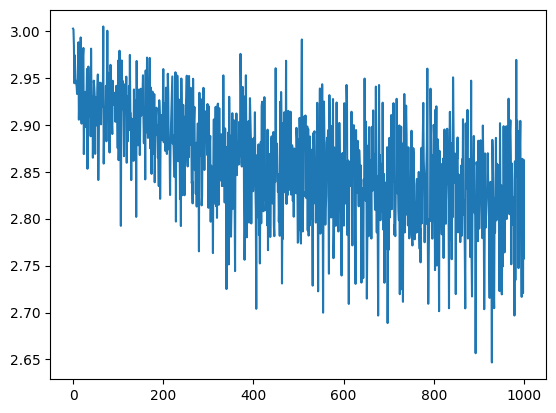

In [ ]:
plt.plot(np.linspace(0, epochs,epochs), loss_hist[::86])

<BarContainer object of 24 artists>

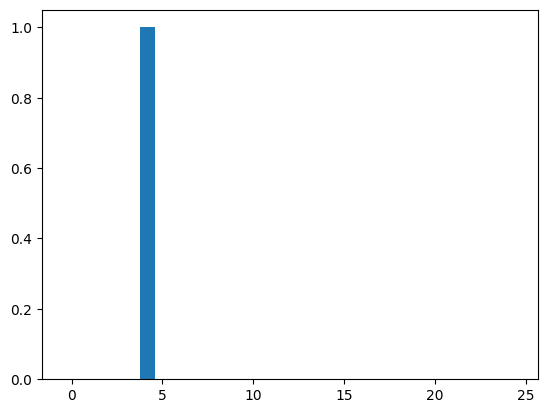

In [ ]:
plt.bar(np.linspace(0, 24, 24), model(test_X)[0].detach())
#plt.bar(np.linspace(0, 24, 24), test_Y[0])

In [ ]:
model(test_X)[0].detach()

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0646e-40, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.4922e-40,
        0.0000e+00, 0.0000e+00, 1.6313e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [ ]:
test_Y[0]

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

#Change From individual categorical to predicting full starting grid